In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/Titanic.csv


In [2]:
# Импортируем необходимые библиотеки
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем данные
df = pd.read_csv('/kaggle/input/titanic/Titanic.csv')

# Просматриваем все данные
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Быстрый просмотр первых пяти значений
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Шаг первый - визуализируем признаки

In [4]:
# Настраиваем графики для удобного отображения
plt.style.use('ggplot')
sns.set_palette('muted')

# Увеличиваем размер графиков для лучшей читабельности
plt.figure(figsize=(6, 4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

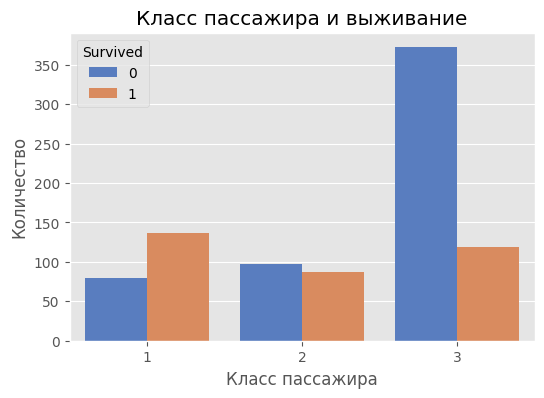

In [5]:
# 1. Распределение признака 'Pclass' (Класс пассажира)
# График показывает, как распределены пассажиры по классам и сколько выжило в каждом классе
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=df, hue='Survived')
plt.title('Класс пассажира и выживание')
plt.xlabel('Класс пассажира')
plt.ylabel('Количество')
plt.show()

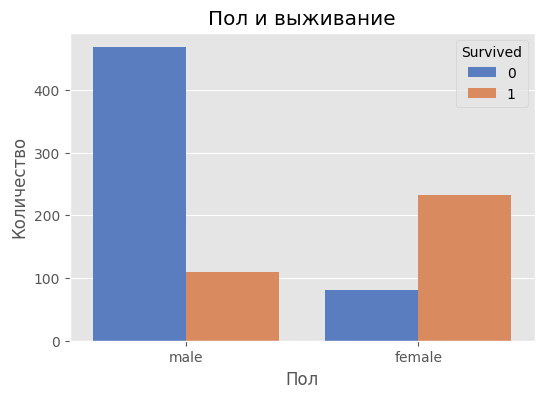

In [6]:
# 2. Распределение признака 'Sex' (Пол) и связь с выживанием
# Этот график показывает, как пол пассажира связан с вероятностью выживания
# Он визуализирует количество мужчин и женщин, а также сколько из них выжило или нет
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df, hue='Survived')
plt.title('Пол и выживание')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


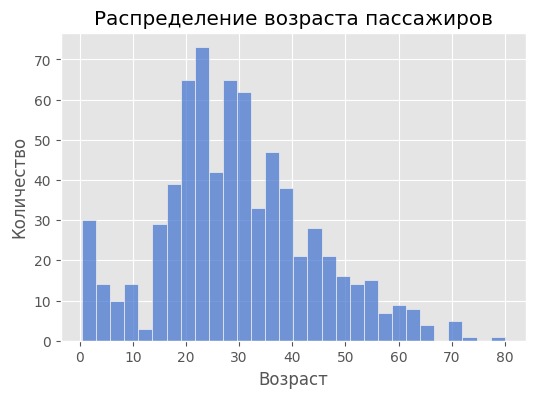

In [7]:
# 3. Распределение признака 'Age' (Возраст)
# Гистограмма показывает общее распределение возраста пассажиров
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'].dropna(), bins=30, kde=False)
plt.title('Распределение возраста пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


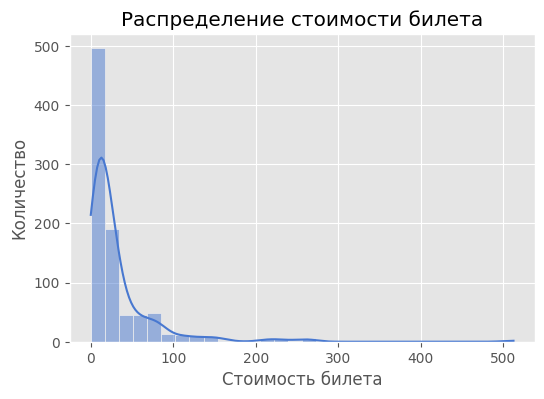

In [8]:
# 4. Распределение признака 'Fare' (Стоимость билета)
# Этот график показывает распределение стоимости билетов среди всех пассажиров
plt.figure(figsize=(6, 4))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Распределение стоимости билета')
plt.xlabel('Стоимость билета')
plt.ylabel('Количество')
plt.show()

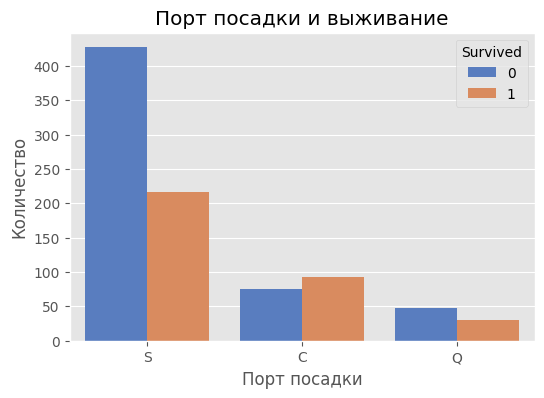

In [9]:
# 5. Распределение признака 'Embarked' (Порт посадки) и выживание
# График показывает, сколько пассажиров из каждого порта посадки выжило и погибло.
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', data=df, hue='Survived')
plt.title('Порт посадки и выживание')
plt.xlabel('Порт посадки')
plt.ylabel('Количество')
plt.show()

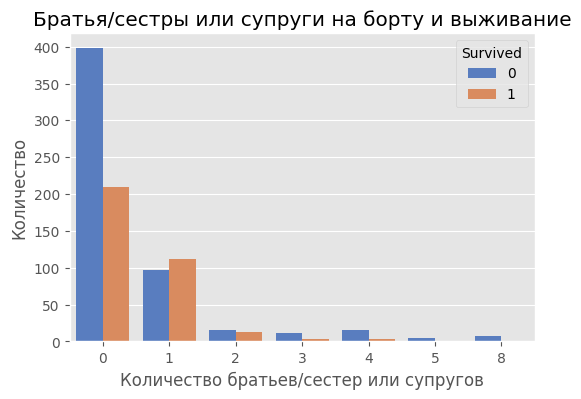

In [10]:
# 6. Распределение признака 'SibSp' (Братья/сестры или супруги на борту) и выживание
# График показывает, как количество братьев/сестер или супругов влияет на выживание пассажиров
plt.figure(figsize=(6, 4))
sns.countplot(x='SibSp', data=df, hue='Survived')
plt.title('Братья/сестры или супруги на борту и выживание')
plt.xlabel('Количество братьев/сестер или супругов')
plt.ylabel('Количество')
plt.show()

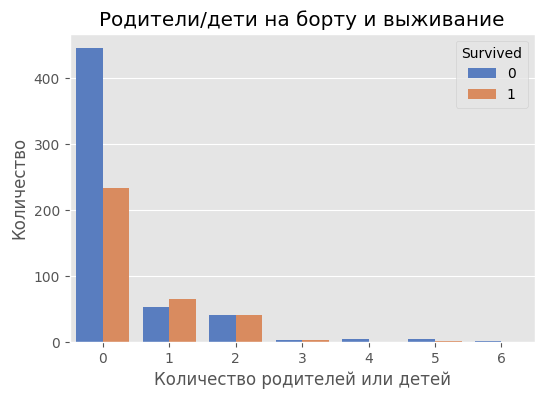

In [11]:
# 7. Распределение признака 'Parch' (Родители/дети на борту) и выживание
# График показывает, как количество родителей/детей на борту и связано с выживанием
plt.figure(figsize=(6, 4))
sns.countplot(x='Parch', data=df, hue='Survived')
plt.title('Родители/дети на борту и выживание')
plt.xlabel('Количество родителей или детей')
plt.ylabel('Количество')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


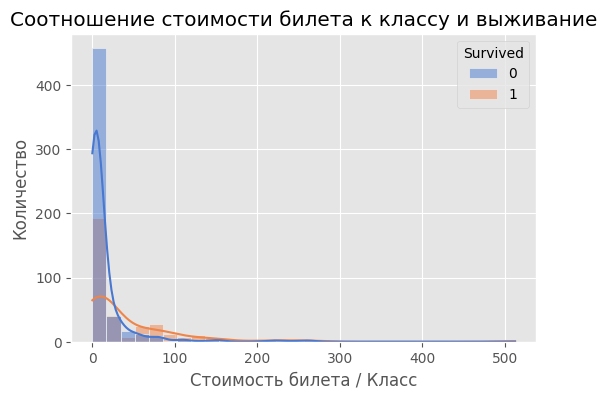

In [12]:
# 8. Соотношение стоимости билета к классу (Fare/Pclass) и выживание
# График созданный путем деления стоимости билета на класс пассажира
# Это может показать разницу в привилегиях внутри одного класса
plt.figure(figsize=(6, 4))
df['Fare_Per_Class'] = df['Fare'] / df['Pclass']  # Деление стоимости билета на класс пассажира
sns.histplot(data=df, x='Fare_Per_Class', hue='Survived', bins=30, kde=True)
plt.title('Соотношение стоимости билета к классу и выживание')
plt.xlabel('Стоимость билета / Класс')
plt.ylabel('Количество')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

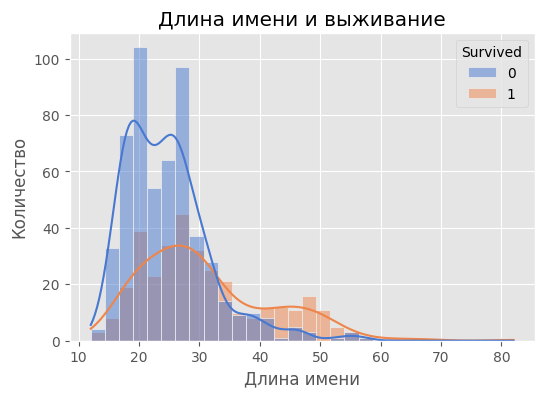

In [13]:
# 9. Длина имени пассажира и его связь с выживанием
# Длина имени как новый признак, который может показать связь социального статуса (через титулы) и выживания
df['Name_Length'] = df['Name'].apply(len)  # Вычисляем длину имени
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Name_Length', hue='Survived', bins=30, kde=True)
plt.title('Длина имени и выживание')
plt.xlabel('Длина имени')
plt.ylabel('Количество')
plt.show()

Шаг второй - инженерия признаков

In [14]:
# Копируем оригинальный DataFrame, чтобы не изменять исходные данные
df_copy = df.copy()

# 1. Извлечение титулов из имени
# Title (Титул): Титулы пассажиров могут помочь разделить данные на социальные группы
# Например, титул "Mr" (мужчина) мог означать меньшие шансы на выживание по сравнению с "Mrs" (женщина)
df_copy['Title'] = df_copy['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

# Группируем редкие титулы в общие категории
title_mapping = {
    "Mr": "Mr", "Mrs": "Mrs", "Miss": "Miss", "Master": "Master",
    "Dr": "Rare", "Rev": "Rare", "Col": "Rare", "Major": "Rare",
    "Mlle": "Miss", "Mme": "Mrs", "Ms": "Miss", "Lady": "Rare",
    "Countess": "Rare", "Jonkheer": "Rare", "Don": "Rare", "Sir": "Rare",
    "Capt": "Rare"
}

df_copy['Title'] = df_copy['Title'].map(title_mapping)

# 2. Признак "Family Size" (размер семьи)
# У пассажиров с большим количеством членов семьи могут быть разные шансы на выживание по сравнению с одиночками
df_copy['Family_Size'] = df_copy['SibSp'] + df_copy['Parch'] + 1  # Добавляем 1, т.к. учитываем самого пассажира

# 3. Признак "IsAlone" (Был ли пассажир один)
# Пассажиры, которые путешествовали в одиночку, могли иметь разные шансы на выживание по сравнению с теми, кто был с семьей
df_copy['IsAlone'] = 1  # Изначально предполагаем, что пассажир был один
df_copy.loc[df_copy['Family_Size'] > 1, 'IsAlone'] = 0  # Если Family_Size > 1, то он не был один

# 4. Бинаризация возраста (дети до 16 лет)
# Дети могли иметь больше шансов на выживание, поэтому этот признак выделяет младших пассажиров
df_copy['Age_Bin'] = pd.cut(df_copy['Age'], bins=[0, 16, 100], labels=[1, 0])  # 1 = ребенок, 0 = взрослый

# 5. Заполнение пропусков в данных
# Пропущенные значения в возрасте, стоимости билета и порту посадки были заполнены медианными значениями или наиболее частыми,
# что позволяет не терять важные данные

# Заполнение пропусков в возрасте медианным значением
df_copy['Age'] = df_copy['Age'].fillna(df_copy['Age'].median())

# Заполнение пропусков в стоимости билета медианным значением
df_copy['Fare'] = df_copy['Fare'].fillna(df_copy['Fare'].median())

# Заполнение пропусков в порту посадки наиболее часто встречающимся значением
df_copy['Embarked'] = df_copy['Embarked'].fillna(df_copy['Embarked'].mode()[0])

# 6. Нормализация признака 'Fare' (стоимость билета)
# Нормализация делает так, что значения признака будут иметь среднее значение 0 и стандартное отклонение 1.
df_copy['Fare'] = (df_copy['Fare'] - df_copy['Fare'].mean()) / df_copy['Fare'].std()

# 7. Преобразование категориальных признаков в числовые (например, Sex, Embarked, Title)
df_copy['Sex'] = df_copy['Sex'].map({'male': 0, 'female': 1})
df_copy['Embarked'] = df_copy['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df_copy['Title'] = df_copy['Title'].map({'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master': 3, 'Rare': 4})

# Проверим первые пять значений итоговых данных
df_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Per_Class,Name_Length,Title,Family_Size,IsAlone,Age_Bin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,-0.502163,NaN,0,2.416667,23,0.0,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,0.786404,C85,1,71.283300,51,1.0,2,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,-0.488580,NaN,0,2.641667,22,2.0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,0.420494,C123,0,53.100000,44,1.0,2,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,-0.486064,NaN,0,2.683333,24,0.0,1,1,0


Шаг третий - подготовка данных для модели

In [15]:
# Удаляем ненужные колонки
df_cleaned = df_copy.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
df_cleaned.dropna(inplace=True)

# Разделяем данные на признаки (X) и целевую переменную (y)
X = df_cleaned.drop(columns=['Survived'])
y = df_cleaned['Survived']

In [16]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Per_Class,Name_Length,Title,Family_Size,IsAlone,Age_Bin
0,3,0,22.0,1,0,-0.502163,0,2.416667,23,0.0,2,0,0
1,1,1,38.0,1,0,0.786404,1,71.283300,51,1.0,2,0,0
2,3,1,26.0,0,0,-0.488580,0,2.641667,22,2.0,1,1,0
3,1,1,35.0,1,0,0.420494,0,53.100000,44,1.0,2,0,0
4,3,0,35.0,0,0,-0.486064,0,2.683333,24,0.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,3,1,39.0,0,5,-0.061964,2,9.708333,36,1.0,6,0,0
886,2,0,27.0,0,0,-0.386454,0,6.500000,21,4.0,1,1,0
887,1,1,19.0,0,0,-0.044356,0,30.000000,28,2.0,1,1,0
889,1,0,26.0,0,0,-0.044356,1,30.000000,21,0.0,1,1,0


In [17]:
# Масштабируем признаки
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
X

array([[ 0.90991672, -0.75759583, -0.52970561, ...,  0.03687456,
        -1.14017543, -0.4038962 ],
       [-1.479662  ,  1.31996503,  0.57176984, ...,  0.03687456,
        -1.14017543, -0.4038962 ],
       [ 0.90991672,  1.31996503, -0.25433675, ..., -0.63726798,
         0.87705802, -0.4038962 ],
       ...,
       [-1.479662  ,  1.31996503, -0.73623225, ..., -0.63726798,
         0.87705802, -0.4038962 ],
       [-1.479662  , -0.75759583, -0.25433675, ..., -0.63726798,
         0.87705802, -0.4038962 ],
       [ 0.90991672, -0.75759583,  0.15871655, ..., -0.63726798,
         0.87705802, -0.4038962 ]])

In [19]:
# Преобразовываем в NumPy массивы для Keras
X = np.array(X)
y = np.array(y)

In [20]:
y

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

In [21]:
# Смотрим количество пропущенных значений в кажом столбце df_cleaned
df_cleaned.isna().sum()

Survived          0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Fare              0
Embarked          0
Fare_Per_Class    0
Name_Length       0
Title             0
Family_Size       0
IsAlone           0
Age_Bin           0
dtype: int64

In [22]:
# Импортируем необходимые библиотеки
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Разделяем данные на тренировочную и тестовую выборки (например, 80% на обучение и 20% на тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование целевой переменной в формат One-hot с использованием to_categorical
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

# Проверим размеры тренировочной и тестовой выборок
print(f"Размер X_train: {X_train.shape}")
print(f"Размер y_train_onehot: {y_train_onehot.shape}")
print(f"Размер X_test: {X_test.shape}")
print(f"Размер y_test_onehot: {y_test_onehot.shape}")

Размер X_train: (570, 13)
Размер y_train_onehot: (570, 2)
Размер X_test: (143, 13)
Размер y_test_onehot: (143, 2)


Шаг четвертый - строим модель

In [23]:
# Импортируем необходимые библиотеки
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Создаем модель
model = Sequential()

# Входной слой с 64 нейронами и функцией активации ReLU
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Добавляем Dropout для регуляризации (уменьшает вероятность переобучения)
model.add(Dropout(0.5))

# Скрытый слой с 32 нейронами и функцией активации ReLU
model.add(Dense(32, activation='relu'))

# Добавляем еще один Dropout для регуляризации
model.add(Dropout(0.5))

# Выходной слой с функцией активации softmax для бинарной классификации
model.add(Dense(2, activation='softmax'))

# Компилируем модель, используя Adam оптимизатор и функцию потерь categorical_crossentropy
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Ранняя остановка при отсутствии улучшений
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Обучаем модель
history = model.fit(X_train, y_train_onehot, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Оценим точность модели на тестовой выборке
test_loss, test_acc = model.evaluate(X_test, y_test_onehot)

print(f'Точность на тестовой выборке: {test_acc:.4f}')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3985 - loss: 0.9964 - val_accuracy: 0.4912 - val_loss: 0.6912
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5065 - loss: 0.7561 - val_accuracy: 0.6667 - val_loss: 0.6204
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5892 - loss: 0.6914 - val_accuracy: 0.7193 - val_loss: 0.5800
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6426 - loss: 0.6281 - val_accuracy: 0.7368 - val_loss: 0.5552
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7531 - loss: 0.5603 - val_accuracy: 0.7368 - val_loss: 0.5368
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7819 - loss: 0.5129 - val_accuracy: 0.7544 - val_loss: 0.5233
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7565 - loss: 0.5267 - val_accuracy: 0.7544 - val_loss: 0.5139
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7206 - loss: 0.5280 - val_accuracy: 0.7719 - 

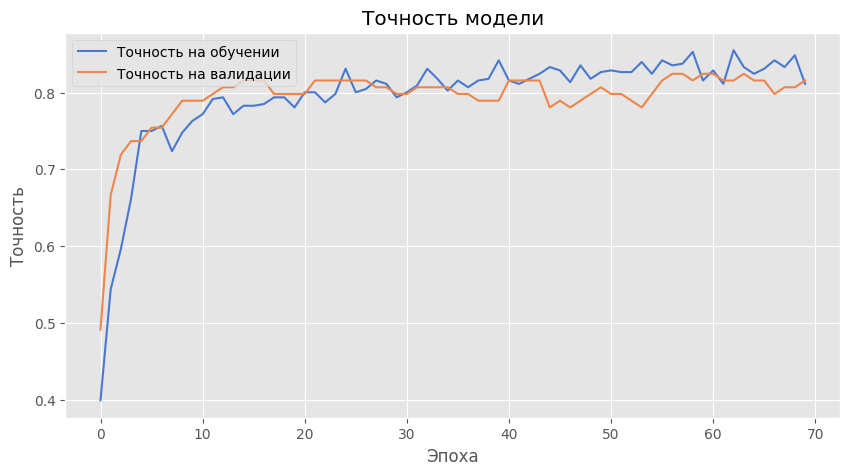

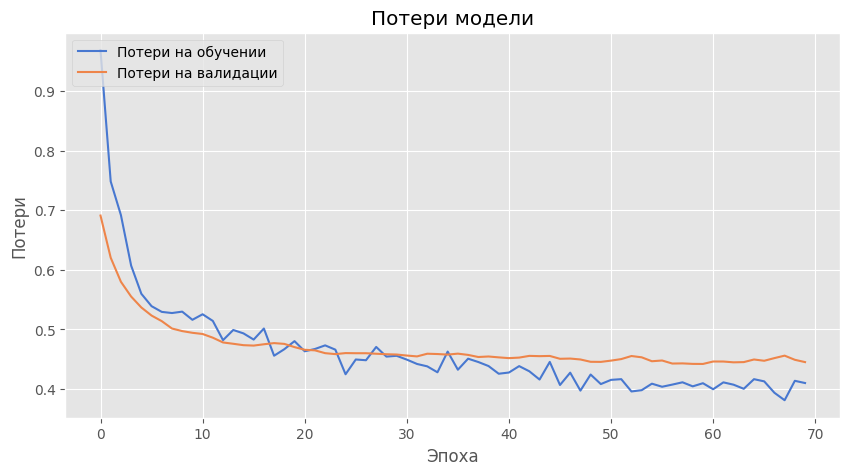

In [24]:
# График точности
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на валидации')
plt.title('Точность модели')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend(loc='upper left')
plt.show()

# График потерь
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Потери на обучении')
plt.plot(history.history['val_loss'], label='Потери на валидации')
plt.title('Потери модели')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend(loc='upper left')
plt.show()